In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

file_path = './data'
os.chdir(file_path)

train_x_df = pd.read_csv('train_x_df.csv',encoding='latin1')

In [2]:
coin9_df = train_x_df[train_x_df['coin_index'] == 9]

In [3]:
 a = train_x_df[train_x_df['volume'] != 0]['coin_index'].value_counts()

In [4]:
b = train_x_df[train_x_df['volume'] == 0]['coin_index'].value_counts()

In [5]:
(b/a * 100)


0     0.936488
1     1.171940
2     0.607160
3     0.633834
4     0.356338
5    94.167393
6     1.110875
7     3.873829
8     1.817524
9     1.340988
Name: coin_index, dtype: float64

### 일간 변동률 구하기(daily percent change)
$ R_t(오늘 변동률) = (R_t(오늘 종가) - R_t-1(어제 종가)) / (R_t-1(어제 종가)) * 100 $

In [8]:
experiment_df = coin9_df[coin9_df['sample_id'] == 0]

In [12]:
dpc = (experiment_df['close'] / experiment_df['close'].shift(1) -1) * 100

In [19]:
dpc.iloc[0] = 0

In [23]:
dpc.describe()

count    1380.000000
mean        0.001258
std         0.081793
min        -0.429058
25%        -0.037268
50%         0.000127
75%         0.042510
max         0.625960
Name: close, dtype: float64

분당 변동률 누적합 구하는 방법

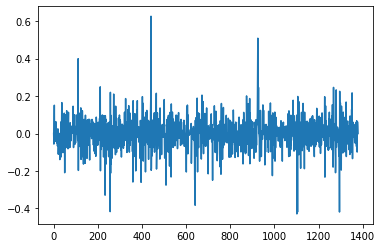

In [29]:
dpc.plot(kind='line')

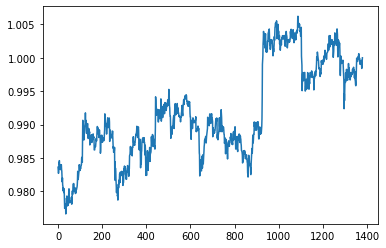

In [28]:
experiment_df.open.plot(kind='line')

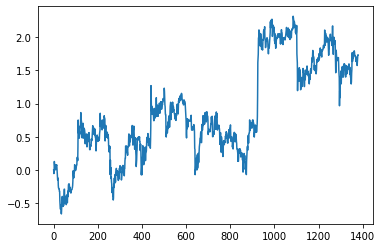

In [34]:
dpc.cumsum().plot(kind='line')

### MDD(Maximum Drawdown,최대 손실 낙폭) 
# MDD(Maximum Drawdown,최대 손실 낙폭) 
퀀트 투자에서는 수익률을 높이는 것보다 MDD를 낮추는 것이 더 낫다고 할 만큼 중요한 지표
MDD = (최저점 - 최고점) / 최저점

In [48]:
window = 1380
peak = experiment_df['close'].rolling(window, min_periods=1).max()


In [50]:
drawdown = experiment_df['close'] / peak - 1.0

In [53]:
max_dd = drawdown.rolling(window, min_periods=1).min()

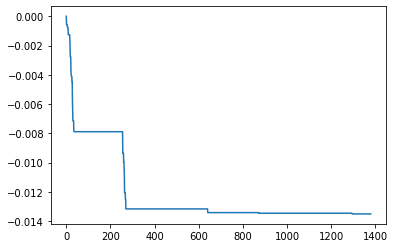

In [54]:
max_dd.plot()

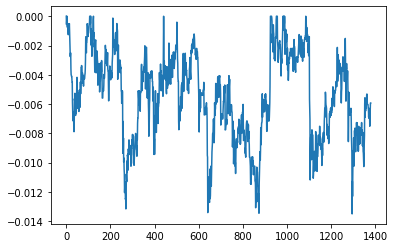

In [52]:
drawdown.plot()

In [55]:
max_dd.min()

-0.01350786700307327